In [ ]:
import pandas as pd

# Creating a dictionary with sample student data
data = {
    'hours_studied': [6, 8, 7, 5, 9, 4, 6, 3, 8, 7],
    'attendance_percentage': [85, 90, 80, 75, 92, 60, 88, 55, 95, 85],
    'assignments_completed': [10, 12, 11, 9, 13, 8, 10, 6, 12, 11],
    'extracurricular_participation': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
    'performance_index': [78, 85, 82, 70, 88, 65, 80, 50, 90, 83]
}

# Creating a DataFrame
df = pd.DataFrame(data)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Assume the dataset has numerical and categorical features with a target column 'performance_index'
# Preprocess the data
X = df.drop('performance_index', axis=1)
y = df['performance_index']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 5671.6719 - mae: 74.4164 - val_loss: 7622.4160 - val_mae: 87.2709
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 5661.7095 - mae: 74.3505 - val_loss: 7610.3652 - val_mae: 87.2019
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 5657.5625 - mae: 74.3211 - val_loss: 7598.1245 - val_mae: 87.1318
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 5652.9233 - mae: 74.2917 - val_loss: 7584.7686 - val_mae: 87.0552
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 5638.8442 - mae: 74.1877 - val_loss: 7571.6270 - val_mae: 86.9797
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 5635.7803 - mae: 74.1617 - val_loss: 7559.5962 - val_mae: 86.9105
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 5620.3359 - mae: 74.0671 - val_loss: 7547.3828 - val_mae: 86.8403
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 5621.5391 - mae: 74.0854 - val_loss: 7534.0869 - val_mae: 86.7637
Epoch 9/50
1

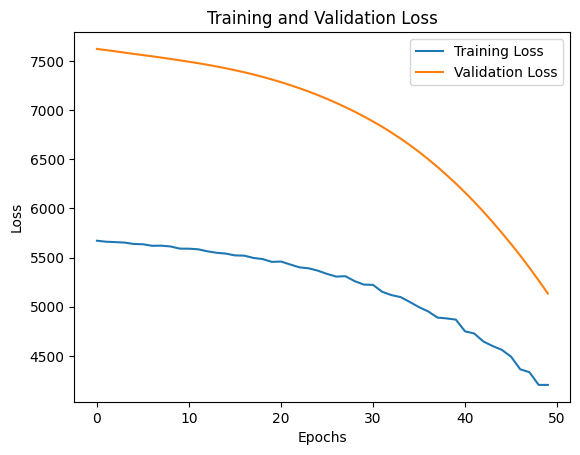

In [ ]:
# Visualizing training process
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5134.5195 - mae: 71.6322
Test MAE: 71.63224792480469


In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
